<a href="https://colab.research.google.com/github/rishiiiiitaaaaa/Nucleus_training_assignments/blob/main/machine_learning/assignment01/A/ML_partA_b1_classification_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A1:Exploratory Data Analysis (EDA)

In [ ]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 2. Load Dataset
# Titanic dataset is available in seaborn
titanic = sns.load_dataset('titanic')

print("First 5 rows:")
display(titanic.head())

# Insight:
# The Titanic dataset contains passenger details such as age, sex, class, and survival information. Our target variable is 'survived'.


First 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 3. Basic Info
print("\nShape of dataset(initial):", titanic.shape)
print("\nColumn names:", titanic.columns.tolist())
print("\nData types:\n", titanic.dtypes)

# Insight:
# There are around 891 rows and 15 columns.
# Columns include both numerical (age, fare) and categorical (sex, class, embarked).



Shape of dataset(initial): (891, 15)

Column names: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Data types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [ ]:
# 4. Summary Statistics
print("\nSummary Statistics:")
print(titanic.describe())

# Insight:
# Average passenger age is ~29, fare has a high spread (with some outliers),
# and many categorical variables like sex, embarked, and class.



Summary Statistics:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


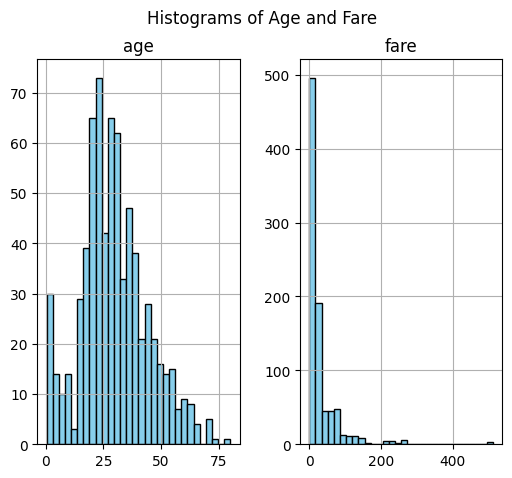

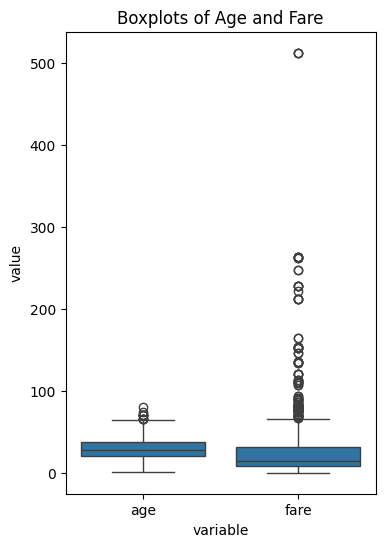

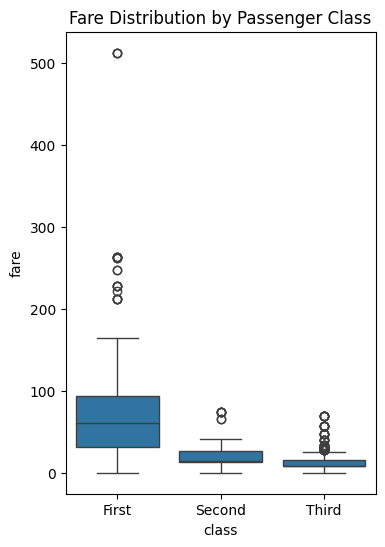

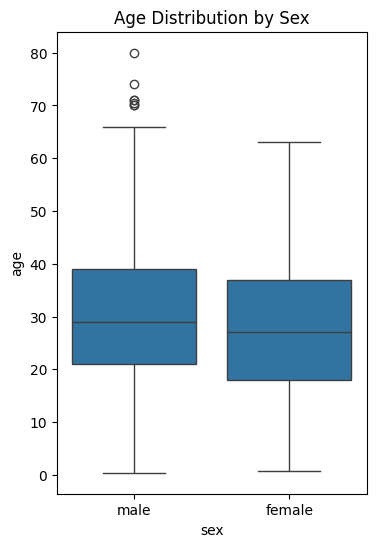

In [ ]:
# 5. Visualize Distributions
# Histograms for Age & Fare
titanic[['age', 'fare']].hist(bins=30, figsize=(6, 5), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Age and Fare")
plt.show()

# Boxplots (using melt for better comparison)
plt.figure(figsize=(4, 6))
sns.boxplot(x="variable", y="value", data=titanic[['age', 'fare']].melt())
plt.title("Boxplots of Age and Fare")
plt.show()
# Category-wise distribution plots (adds deeper insight than simple histograms)
plt.figure(figsize=(4, 6))
sns.boxplot(x="class", y="fare", data=titanic)
plt.title("Fare Distribution by Passenger Class")
plt.show()

plt.figure(figsize=(4, 6))
sns.boxplot(x="sex", y="age", data=titanic)
plt.title("Age Distribution by Sex")
plt.show()


# Insight:
# Age: Right-skewed, most passengers 20–40 years old.
# Fare: Highly skewed with extreme outliers (some > 500).
# Fare vs Class: Higher-class passengers generally paid much higher fares.
# Age vs Sex: Male passengers are spread across age groups, but female passengers skew slightly younger.

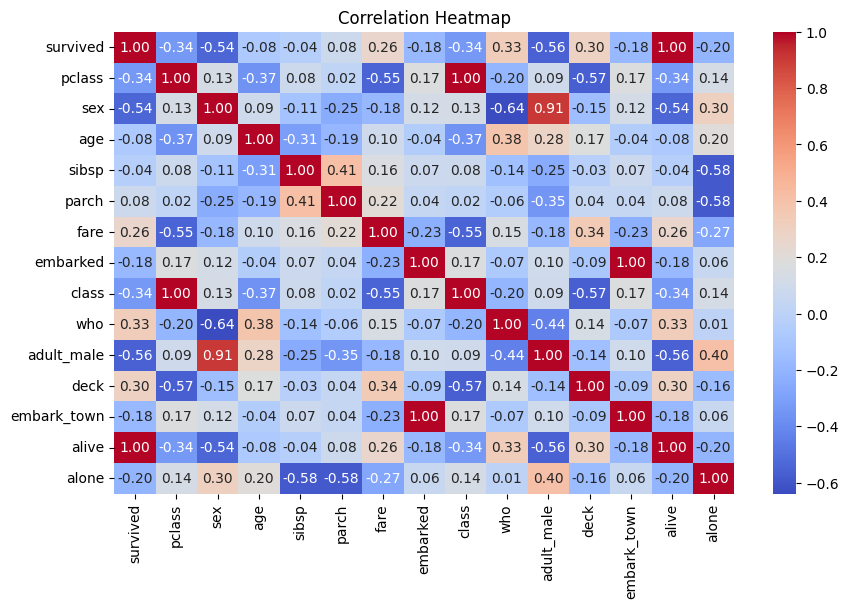

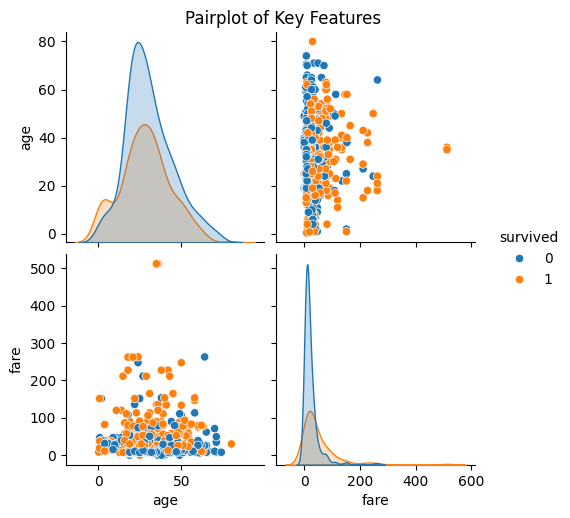

In [ ]:
# 6. Correlation Analysis

# Convert categorical to numeric temporarily for correlation
titanic_encoded = titanic.copy()
for col in titanic_encoded.select_dtypes(include=['category', 'object']).columns:
    titanic_encoded[col] = titanic_encoded[col].astype('category').cat.codes

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
selected_cols = ['survived', 'age', 'fare']
sns.pairplot(titanic[selected_cols].dropna(), hue="survived", diag_kind="kde")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# Insights:
# - Survival is positively correlated with higher fare (wealthier passengers had better survival chances).
# - Survival is negatively correlated with pclass (1st class passengers survived more).
# - Age has very weak correlation with survival, indicating age alone was not a strong factor.
# - Pairplot shows that survivors are concentrated in lower pclass (1) and higher fare ranges.
# - Non-survivors dominate 3rd class and low fare passengers.


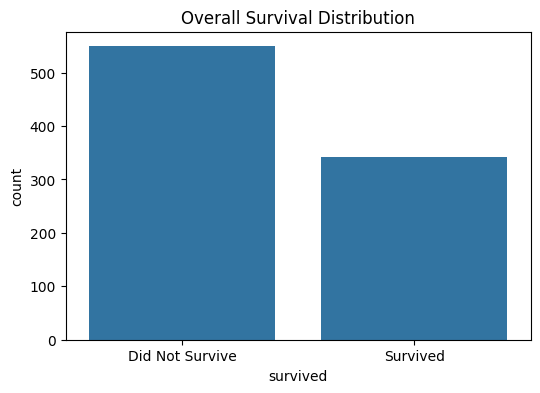

Survival Counts:
 survived
0    549
1    342
Name: count, dtype: int64

Survival Percentage:
 survived
0    61.616162
1    38.383838
Name: count, dtype: float64


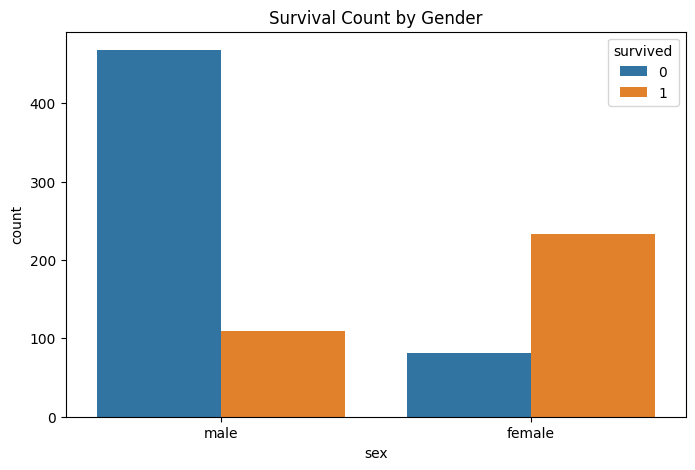

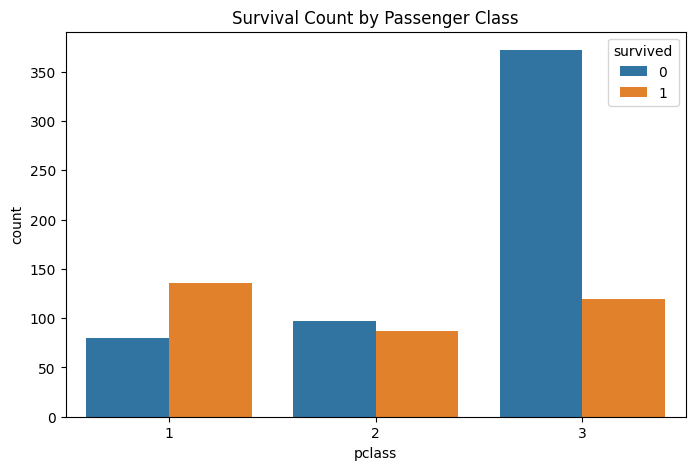

In [ ]:
# 7. Check Class Imbalance (Target Variable)
# Overall survival distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="survived", data=titanic)
plt.title("Overall Survival Distribution")
plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.show()

# Print proportions
survival_counts = titanic['survived'].value_counts()
print("Survival Counts:\n", survival_counts)
print("\nSurvival Percentage:\n", survival_counts / len(titanic) * 100)

# Categorical Survival Analysis (sex vs survived)
plt.figure(figsize=(8, 5))
sns.countplot(x="sex", hue="survived", data=titanic)
plt.title("Survival Count by Gender")
plt.show()

# Categorical Survival Analysis (pclass vs survived)
plt.figure(figsize=(8, 5))
sns.countplot(x="pclass", hue="survived", data=titanic)
plt.title("Survival Count by Passenger Class")
plt.show()

# Insights:
# - The dataset is imbalanced: about 62% did not survive, while only ~38% survived.
# - Females had a much higher survival rate compared to males.
# - 1st class passengers had better chances of survival, while 3rd class passengers had the lowest.


# A2 :Data Understanding

In [ ]:

# 1. Missing Value Analysis
print("\nMissing values per column:")
print(titanic.isnull().sum())

# Insight:
# Age has many missing values, cabin is mostly missing,
# and embarked has 2 missing entries. Handling these will be important later.



Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# Identify Categorical & Numerical Columns
categorical_cols = titanic.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = titanic.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)
# Insights:
# Categorical features represent qualitative data (e.g., Sex, Embarked).
# Numerical features include quantitative values like Age, Fare, SibSp, Parch.



Categorical Columns: ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']
Numerical Columns: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


In [ ]:
# Look for Duplicates
num_duplicates = titanic.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    print(" - Duplicates detected, should be dropped before modeling.")
else:
    print(" - No duplicates found.")

# Look for Outliers (IQR method on numeric columns)
print("\nOutlier Analysis (IQR method):")
for col in numerical_cols:
    Q1 = titanic[col].quantile(0.25)
    Q3 = titanic[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = titanic[(titanic[col] < lower_bound) | (titanic[col] > upper_bound)]
    print(f" - {col}: {outliers.shape[0]} outliers")
# Insights:
# Fare typically has many outliers (rich passengers).
# Age has a few outliers but mostly within expected range.



Number of duplicate rows: 107
 - Duplicates detected, should be dropped before modeling.

Outlier Analysis (IQR method):
 - survived: 0 outliers
 - pclass: 0 outliers
 - age: 11 outliers
 - sibsp: 46 outliers
 - parch: 213 outliers
 - fare: 116 outliers


# A3 :Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

# 1. Handle Missing Values
# Identify numerical and categorical columns
numerical_cols = titanic.select_dtypes(include=np.number).columns.tolist()
categorical_cols = titanic.select_dtypes(exclude=np.number).columns.tolist()

# Numerical Columns
# Use median for most numeric columns (robust to outliers)
for col in numerical_cols:
    if col not in ["age", "fare"]:  # advanced handling for sensitive columns
        titanic[col] = titanic[col].fillna(titanic[col].median())

# Use KNN imputer for sensitive numeric cols
knn_imputer = KNNImputer(n_neighbors=5)
titanic[["age", "fare"]] = knn_imputer.fit_transform(titanic[["age", "fare"]])

# Categorical Columns
# Mode imputation
for col in categorical_cols:
    titanic[col] = titanic[col].fillna(titanic[col].mode()[0])

# Extra safety using SimpleImputer
cat_imputer = SimpleImputer(strategy="most_frequent")
titanic[categorical_cols] = cat_imputer.fit_transform(titanic[categorical_cols])



In [ ]:

# 2. Remove Duplicates
titanic = titanic.drop_duplicates()
print(f"Shape after removing duplicates: {titanic.shape}")

Shape after removing duplicates: (783, 15)


In [ ]:
# 3. Outlier Handling (Capping)

numerical_cols = ['age', 'fare', 'sibsp', 'parch']

for col in numerical_cols:
    Q1 = titanic[col].quantile(0.25)
    Q3 = titanic[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values (do not drop rows)
    titanic[col] = np.where(titanic[col] < lower_bound, lower_bound, titanic[col])
    titanic[col] = np.where(titanic[col] > upper_bound, upper_bound, titanic[col])

# Optional: verify no rows are lost
print(f"Final dataset shape: {titanic.shape}")


Final dataset shape: (783, 15)


In [ ]:
# 4. Post-cleaning Checks
print(f"Dataset shape after cleaning: {titanic.shape}")

for col in numerical_cols:
    # Insight: Check min and max values after outlier removal
    print(f"{col}: min={titanic[col].min()}, max={titanic[col].max()}")

# Insight: Verify if any missing values remain
print("Any missing values left?", titanic.isnull().sum().sum())

# Insight: Verify if any duplicates remain
print("Number of duplicates left:", titanic.duplicated().sum())


Dataset shape after cleaning: (783, 15)
age: min=0.42, max=63.5
fare: min=0.0, max=73.41975000000001
sibsp: min=0.0, max=2.5
parch: min=0.0, max=2.5
Any missing values left? 0
Number of duplicates left: 4


# A4:Feature Transformation

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

# Encode Ordinal Feature: 'pclass'
ordinal_encoder = OrdinalEncoder()
titanic['pclass'] = ordinal_encoder.fit_transform(titanic[['pclass']])

# Encode Nominal Categorical Variables: 'sex', 'embarked'

titanic_encoded = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)
print("Encoding complete. Sample data:")
print(titanic.head())
# Insight:
# - Ordinal Encoding used for 'pclass' since it has a natural order (1st > 2nd > 3rd).
# - One-Hot Encoding applied to 'sex', 'embarked' (nominal, no natural order).
# - drop_first=True prevents dummy variable trap.

Encoding complete. Sample data:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0     2.0    male  22.0    1.0    0.0   7.2500        S  Third   
1         1     0.0  female  38.0    1.0    0.0  71.2833        C  First   
2         1     2.0  female  26.0    0.0    0.0   7.9250        S  Third   
3         1     0.0  female  35.0    1.0    0.0  53.1000        S  First   
4         0     2.0    male  35.0    0.0    0.0   8.0500        S  Third   

     who adult_male deck  embark_town alive  alone  
0    man       True    C  Southampton    no  False  
1  woman      False    C    Cherbourg   yes  False  
2  woman      False    C  Southampton   yes   True  
3  woman      False    C  Southampton   yes  False  
4    man       True    C  Southampton    no   True  


In [ ]:
# Scale Numerical Features
scaler = StandardScaler()
titanic_encoded[numerical_cols] = scaler.fit_transform(titanic_encoded[numerical_cols])

# Check scaled features
print("\nScaled Numerical Feature Summary:")
print(titanic_encoded[numerical_cols].agg(['mean', 'std', 'min', 'max']).T)

# Insight:
# - StandardScaler normalizes features (mean=0, std=1).
# - More robust than MinMaxScaler for skewed/outlier-heavy Titanic features (e.g., fare).
# - Helps distance-based models (KNN, SVM) and gradient-based models converge faster.


Scaled Numerical Feature Summary:
               mean       std       min       max
age   -4.991041e-17  1.000639 -2.146843  2.458744
fare   5.444772e-17  1.000639 -1.162136  2.055011
sibsp  2.268655e-17  1.000639 -0.634598  2.889445
parch  8.847754e-17  1.000639 -0.544446  2.990388


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()
titanic_encoded_mm = titanic_encoded.copy()
titanic_encoded_mm[numerical_cols] = scaler_mm.fit_transform(titanic_encoded_mm[numerical_cols])

print("\nMinMaxScaler Summary (scaled to [0,1]):")
print(titanic_encoded_mm[numerical_cols].agg(['mean', 'std', 'min', 'max']).T)

# Insight:
# MinMaxScaler scaled all numerical features to [0,1]
# age and fare are slightly skewed (mean < 0.5), most passengers are young and paid lower fares
# sibsp and parch mostly 0, few have siblings/parents onboard
# std shows fare has highest spread, others moderate



MinMaxScaler Summary (scaled to [0,1]):
           mean       std  min  max
age    0.466139  0.217266  0.0  1.0
fare   0.361232  0.311033  0.0  1.0
sibsp  0.180077  0.283946  0.0  1.0
parch  0.154023  0.283080  0.0  1.0


# A5:Feature Creation

In [ ]:
# 1. Create Age Groups (binning)
titanic['age_group'] = pd.cut(
    titanic['age'],
    bins=[0, 12, 18, 34, 50, 80],
    labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
)
# Insight: Converts continuous "age" into categorical bins.
# This may capture non-linear survival patterns (e.g., children and seniors
# having different survival chances compared to adults).

# 2. Create Family Size (SibSp + Parch + self)
if 'sibsp' in titanic.columns and 'parch' in titanic.columns:
    titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
# Insight: Captures family/social influence on survival.
# Larger families may have different survival probabilities than solo travelers.

# 3. Create Fare per Person (normalized ratio)
if 'fare' in titanic.columns and 'family_size' in titanic.columns:
    titanic['fare_per_person'] = titanic['fare'] / titanic['family_size']
# Insight: Adjusts fare by family group size.
# Helps reduce skewness in fare distribution and gives a fairer measure
# of economic status per individual.

# Check new features
print(titanic[['age','age_group','sibsp','parch','family_size','fare','fare_per_person']].head())


    age   age_group  sibsp  parch  family_size     fare  fare_per_person
0  22.0  YoungAdult    1.0    0.0          2.0   7.2500          3.62500
1  38.0       Adult    1.0    0.0          2.0  71.2833         35.64165
2  26.0  YoungAdult    0.0    0.0          1.0   7.9250          7.92500
3  35.0       Adult    1.0    0.0          2.0  53.1000         26.55000
4  35.0       Adult    0.0    0.0          1.0   8.0500          8.05000


#A6:Feature Selection


In [ ]:
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Prepare dataset (use label encoding for categorical variables)
df = titanic.copy()
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

X = df.drop('survived', axis=1)
y = df['survived']


In [ ]:
# 1. Filter Method: Correlation
corr_matrix = df.corr(numeric_only=True)
print("Correlation with target (survived):\n",
      corr_matrix['survived'].sort_values(ascending=False))

Correlation with target (survived):
 survived           1.000000
fare               0.306125
fare_per_person    0.250257
parch              0.105006
family_size        0.068848
sibsp              0.011293
embarked_Q        -0.042640
age               -0.068655
embarked_S        -0.126447
pclass            -0.334817
sex_male          -0.515373
Name: survived, dtype: float64


In [ ]:
# 2. Filter Method: Chi-square test
# Step 1: Keep only non-numeric categorical features separate
categorical_features = X.select_dtypes(include=['object']).columns

# Step 2: Convert categorical features to dummy vars (one-hot encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 3: Scale encoded X to [0,1] so chi2 works
X_chi_scaled = pd.DataFrame(
    MinMaxScaler().fit_transform(X_encoded),
    columns=X_encoded.columns
)

# Step 4: Apply Chi-square
chi_selector = SelectKBest(score_func=chi2, k=5)
X_chi = chi_selector.fit_transform(X_chi_scaled, y)

# Step 5: Get scores
chi_scores = pd.Series(chi_selector.scores_, index=X_chi_scaled.columns)
print("\nChi-square scores:\n", chi_scores.sort_values(ascending=False))



Chi-square scores:
 alive_yes                  460.000000
who_woman                  122.886669
adult_male_True             92.859096
who_man                     92.859096
sex_male                    77.823450
class_Third                 40.526543
pclass                      25.698981
deck_B                      20.248453
fare                        19.626006
deck_D                      16.213091
deck_E                      15.039023
deck_C                      10.843446
alone_True                  10.449502
fare_per_person             10.298192
class_Second                 6.350034
parch                        4.486115
embark_town_Southampton      3.421637
embarked_S                   3.421637
deck_F                       2.207681
age_group_YoungAdult         2.038704
family_size                  1.410231
embarked_Q                   1.316372
embark_town_Queenstown       1.316372
age_group_Senior             0.923221
age_group_Teen               0.747888
age                          

In [ ]:
# Wrapper: Recursive Feature Elimination (RFE)
# Step 1: Use already encoded dataframe (all numeric)
# Make a copy of X_encoded from chi-square step
X_rfe = X_encoded.copy()

# Step 2: Logistic Regression for RFE
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X_rfe, y)

# Step 3: Selected features
selected_features_rfe = X_rfe.columns[rfe.support_].tolist()
print("\nRFE Selected Features:", selected_features_rfe)

# Insight:
# - RFE removes least important predictors iteratively.
# - Logistic Regression is interpretable and works well with Titanic survival prediction.
# - Only numeric features should be used (hence we use already encoded X).



RFE Selected Features: ['pclass', 'who_man', 'adult_male_True', 'deck_C', 'alive_yes']


In [ ]:
# Embedded: Feature importance (Random Forest)
# Use already encoded numeric dataframe (from one-hot + ordinal encoding)
X_rf = X_encoded.copy()  # X_encoded should have all numeric columns
y_rf = y.copy()

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_rf, y_rf)

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X_rf.columns)
print("\nRandom Forest Feature Importances:\n", importances.sort_values(ascending=False))

# Insight:
# - Embedded method: Random Forest calculates importance while training.
# - Captures non-linear interactions between features.
# - Works well for Titanic dataset because it has a mix of numeric and categorical features.
# - Only numeric input allowed, so we use preprocessed X_encoded.



Random Forest Feature Importances:
 alive_yes                  0.601918
adult_male_True            0.059747
who_man                    0.058699
sex_male                   0.057743
fare_per_person            0.032483
age                        0.027378
who_woman                  0.027262
fare                       0.027116
pclass                     0.023859
class_Third                0.018195
family_size                0.012959
deck_C                     0.009413
sibsp                      0.007439
parch                      0.005218
class_Second               0.004312
age_group_Adult            0.003280
embarked_S                 0.003183
embark_town_Southampton    0.003053
alone_True                 0.002609
deck_B                     0.002235
age_group_Senior           0.002220
age_group_YoungAdult       0.002140
deck_E                     0.001645
embarked_Q                 0.001332
age_group_Teen             0.001307
embark_town_Queenstown     0.001212
deck_D                     

# B1:Classification

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [ ]:
#helper functions
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluate a classification model:
    - Computes Accuracy, Precision, Recall, F1-score, ROC-AUC
    - Plots Confusion Matrix and ROC Curve
    Returns a dictionary of metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Get predicted probabilities for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # For models like SVM without predict_proba
        y_proba = model.decision_function(X_test)
        # Normalize to [0,1] for ROC-AUC
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    # Print metrics
    print(f"\n{model_name} Metrics")
    print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}, ROC-AUC: {roc:.3f}")

    # Return metrics dictionary with 'Model' key
    metrics = {
        "Model": model_name,  # added Model key
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC-AUC": roc
    }
    return metrics


    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc:.2f})")
    plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()
    plt.show()

    # Return metrics as dictionary
    return {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1, 'ROC-AUC': roc}
#used for model comparision
result=[]

In [ ]:
# Prepare features and target
X = titanic.drop(['survived', 'alive'], axis=1)
y = titanic['survived']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle skewness in numeric features using Yeo-Johnson transformation
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
for feat in numeric_features:
    if abs(titanic[feat].skew()) > 0.75:
        idx = list(X.columns).index(feat)
        pt = PowerTransformer(method='yeo-johnson')
        X_scaled[:, idx] = pt.fit_transform(X_scaled[:, idx].reshape(-1, 1)).flatten()


In [ ]:
# Split data into training and test sets (80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Compute class weights for SVM to handle mild class imbalance
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}



In [ ]:
# Train and tune Logistic Regression using GridSearchCV
lr = LogisticRegression(max_iter=500)
lr_params = {'C': [0.1, 1, 10], 'solver': ['lbfgs']}
lr_grid = GridSearchCV(lr, lr_params, cv=3, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)

# Print best hyperparameters
print("Logistic Regression Best Params:", lr_grid.best_params_)

# Evaluate model using helper function
lr_metrics = evaluate_model(lr_grid.best_estimator_, X_test, y_test, model_name="Logistic Regression")
result.append(lr_metrics)

Logistic Regression Best Params: {'C': 0.1, 'solver': 'lbfgs'}

=== Logistic Regression Metrics ===
Accuracy: 0.822, Precision: 0.768, Recall: 0.815, F1: 0.791, ROC-AUC: 0.884


In [ ]:
# Train and tune Decision Tree using GridSearchCV
dt = DecisionTreeClassifier()
dt_params = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt, dt_params, cv=3, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)

# Print best hyperparameters
print("Decision Tree Best Params:", dt_grid.best_params_)

# Evaluate model using helper function
dt_metrics = evaluate_model(dt_grid.best_estimator_, X_test, y_test, model_name="Decision Tree")
result.append(dt_metrics)

Decision Tree Best Params: {'max_depth': 5, 'min_samples_split': 10}

=== Decision Tree Metrics ===
Accuracy: 0.783, Precision: 0.772, Recall: 0.677, F1: 0.721, ROC-AUC: 0.791


In [ ]:
# Train and tune Random Forest using GridSearchCV
rf = RandomForestClassifier()
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Print best hyperparameters
print("Random Forest Best Params:", rf_grid.best_params_)

# Evaluate model using helper function
rf_metrics = evaluate_model(rf_grid.best_estimator_, X_test, y_test, model_name="Random Forest")
result.append(rf_metrics)

Random Forest Best Params: {'max_depth': 5, 'n_estimators': 100}

=== Random Forest Metrics ===
Accuracy: 0.828, Precision: 0.865, Recall: 0.692, F1: 0.769, ROC-AUC: 0.882


In [ ]:
# Train and tune SVM using GridSearchCV with class weights for imbalance
svm = SVC(probability=True, class_weight=class_weights)
svm_params = {'C': [1, 10, 50], 'gamma': ['scale', 0.01, 0.05, 0.1], 'kernel': ['rbf']}
svm_grid = GridSearchCV(svm, svm_params, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Print best hyperparameters
print("SVM Best Params:", svm_grid.best_params_)

# Evaluate model using helper function
svm_metrics = evaluate_model(svm_grid.best_estimator_, X_test, y_test, model_name="SVM")
result.append(svm_metrics)

SVM Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

=== SVM Metrics ===
Accuracy: 0.834, Precision: 0.800, Recall: 0.800, F1: 0.800, ROC-AUC: 0.873


In [ ]:
# Train and tune XGBoost using GridSearchCV
xgb_model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb_params = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5], 'learning_rate': [0.05, 0.1]}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# Print best hyperparameters
print("XGBoost Best Params:", xgb_grid.best_params_)

# Evaluate model using helper function
xgb_metrics = evaluate_model(xgb_grid.best_estimator_, X_test, y_test, model_name="XGBoost")
result.append(xgb_metrics)

XGBoost Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}

=== XGBoost Metrics ===
Accuracy: 0.815, Precision: 0.821, Recall: 0.708, F1: 0.760, ROC-AUC: 0.866


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:08:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


/tmp/ipython-input-3301544854.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()



Model Comparison (sorted by ROC-AUC):
                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression  0.821656   0.768116  0.815385  0.791045  0.883528
2        Random Forest  0.828025   0.865385  0.692308  0.769231  0.881605
3                  SVM  0.834395   0.800000  0.800000  0.800000  0.873495
4              XGBoost  0.815287   0.821429  0.707692  0.760331  0.865635
1        Decision Tree  0.783439   0.771930  0.676923  0.721311  0.790635


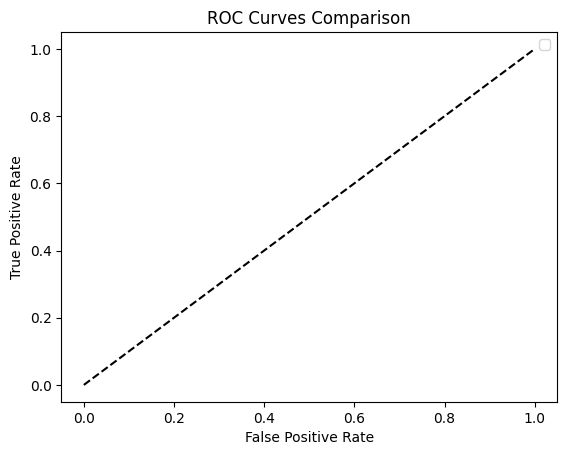

In [ ]:
# Combine all model metrics into a summary table
results_df = pd.DataFrame(result)
print("\nModel Comparison (sorted by ROC-AUC):")
print(results_df.sort_values(by='ROC-AUC', ascending=False))

# ROC curve comparison plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()


Best model for explainability: Logistic Regression


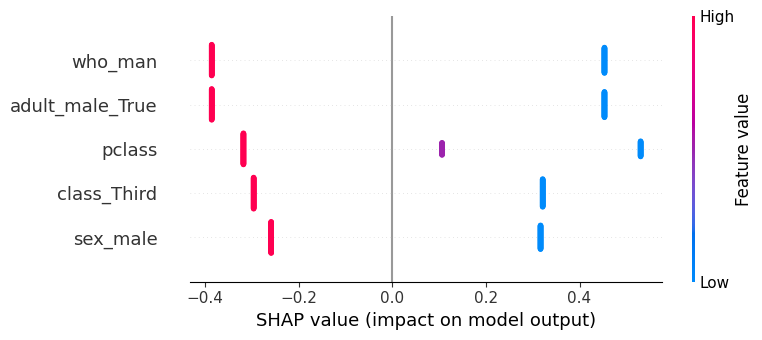

In [ ]:
import shap
import pandas as pd

# Convert X_test to DataFrame for proper feature names
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Identify best model based on ROC-AUC
best_model_name = results_df.sort_values(by='ROC-AUC', ascending=False).iloc[0]['Model']
print(f"Best model for explainability: {best_model_name}")

# Map model names to trained estimators
model_map = {
    'Logistic Regression': lr_grid.best_estimator_,
    'Decision Tree': dt_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_,
    'SVM': svm_grid.best_estimator_,
    'XGBoost': xgb_grid.best_estimator_
}

best_model = model_map[best_model_name]

# Create SHAP explainer
explainer = shap.Explainer(best_model, X_test_df)
shap_values = explainer(X_test_df)

# Summary plot: Top 5 important features
shap.summary_plot(shap_values, features=X_test_df, feature_names=X.columns, max_display=5)
